In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **1. Đọc tập dữ liệu `new_playlists` đã tiền xủ lý**

In [2]:
playlist = pd.read_csv('New_Playlists.csv', sep=',')
playlist

,id,permalink_url,genre,duration,likes_count,reposts_count,user_id,is_album,display_date,track_count,tracks
0,1297775500,https://soundcloud.com/henrik/sets/tent-session,general,23088711,3,0,16,False,07-08-2021,3,"272612733,649886222,425592600"
1,224489873,https://soundcloud.com/henrik/sets/maui,general,36916723,32,7,16,False,12-05-2016,5,"259629933,173516843,237681279,172743281,177856481"
2,5316318,https://soundcloud.com/henrik/sets/all-dranken...,general,14081758,94,22,16,False,02-05-2013,4,"23876268,22746957,39007821,59622690"
3,315,https://soundcloud.com/henrik/sets/testset,general,538434,6,1,16,False,22-07-2008,2,"19,7793"
4,282653735,https://soundcloud.com/joaoflux/sets/ethiopiques,general,7217789,42,5,20,False,11-12-2016,13,"31529637,95060900,125486033,61689615,8547837,3..."
...,...,...,...,...,...,...,...,...,...,...,...
1914,210806092,https://soundcloud.com/jasonw22/sets/electric-...,general,7089353,0,0,3262,False,30-03-2016,19,"162898169,61076838,221302257,166711654,6350155..."
1915,210804688,https://soundcloud.com/jasonw22/sets/discover-...,general,103663575,3,0,3262,False,30-03-2016,114,"157156109,86506558,231202268,24989583,87713059..."
1916,210802848,https://soundcloud.com/jasonw22/sets/songs-to-...,general,11673357,0,0,3262,False,30-03-2016,12,"251158166,36464600,97671879,25100637,6032837,1..."
1917,210801949,https://soundcloud.com/jasonw22/sets/last-fm-s...,general,223683276,1,0,3262,False,30-03-2016,324,"86506558,118908803,24989583,68576416,177473157..."


Thông tin về các trường dữ liệu gồm `11` thuộc tính:

|Thuộc tính|Kiểu dữ liệu|     Ý nghĩa của dữ liệu
|:-----------:|:----------------:|:---------:|
|**id**|Kiểu phân loại|Định danh cho playlist|
|**permalink_url**|Chuỗi|Đường dẫn đến trang Soundcloud|
|**genre**|Chuỗi|Thể loại nhạc của playlist|
|**duration**|Số nguyên|Tổng thời gian các track nhạc trong playlist|
|**likes_count**|Số nguyên|Số lượt yêu thích của playlist|   
|**reposts_count**|Số nguyên|Số lượt đăng lại playlist|    
|**user_id**|Kiểu phân loại|Định danh của người sở hữu playlist|
|**is_album**|Luận lý|Playlist có phải album hay không|   
|**display_date**|Thời gian|Thời điểm playlist hiển thị|   
|**track_count**|Số nguyên|Số lượng track trong playlist|
|**tracks**|Chuỗi|Danh sách id của các track trong playlist được ngăn cách bởi ","|

In [3]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1919 non-null   int64 
 1   permalink_url  1919 non-null   object
 2   genre          1919 non-null   object
 3   duration       1919 non-null   int64 
 4   likes_count    1919 non-null   int64 
 5   reposts_count  1919 non-null   int64 
 6   user_id        1919 non-null   int64 
 7   is_album       1919 non-null   bool  
 8   display_date   1919 non-null   object
 9   track_count    1919 non-null   int64 
 10  tracks         1919 non-null   object
dtypes: bool(1), int64(6), object(4)
memory usage: 151.9+ KB


**Biến đổi thuộc tính**
- Các thuộc tính `id`, `genre`, `permalink_url`, `user_id` và `tracks` cần được đổi về `string`
- Thuộc tính `display_date` chuyển về dạng `datetime`

In [4]:
playlist['id'] = playlist['id'].astype('string')
playlist['genre'] = playlist['genre'].astype('string')
playlist['permalink_url'] = playlist['permalink_url'].astype('string')
playlist['user_id'] = playlist['user_id'].astype('string')
playlist['tracks'] = playlist['tracks'].astype('string')
playlist['display_date'] = pd.to_datetime(playlist['display_date'], format="%d-%m-%Y")

#### **2. Đặt ra nhưng câu hỏi và phân tích thông qua trực quan hoá dữ liệu**

Những câu hỏi đặt ra về tập dữ liệu `playlist`:
- `Playlist` nào nhận được nhiều lượt yêu thích nhất trong năm 2021?
- Yếu tố nào quyết định 1 `playlist` được nhiều người yêu thích:
    - Thể loại của playlist (genre)?
    - Số lượng `track` của playlist?
    - Playlist có phải là album hay không?
- Phân tích thuộc tính `is_album`, liệu rằng các playlist có ở trên soundcloud đều là những album ca nhạc chỉnh chu do 1 nghệ sĩ phát hành hay đa phần là do người dùng tự tổng hợp lại.
- Không xét đến thể loại `general`, đâu là thể loại âm nhạc được đăng tải nhiều nhất trong vòng 10 năm (2010-2020)? Liệu `hip-hop & rap` có phải là xu hướng âm nhạc của thế giới không nói chung và Soundcloud nói riêng hay không?
- Liệu có playlist nào có số lượng track rất ít <= 5 bài nhưng lượt yêu thích lại khá cao >= 1000 likes hay không?

#### **2.1 Dữ liệu dạng số (numeric)**

##### **a) Phân tích đơn biến**

In [5]:
num_pl = playlist.select_dtypes(include = ['float64', 'int64'])
num_pl.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1919.0,1.015274e+07,3.835731e+07,16066.0,807193.0,1597246.0,4286793.5,964912671.0
likes_count,1919.0,2.813340e+01,1.446900e+02,0.0,0.0,3.0,15.0,3653.0
reposts_count,1919.0,4.445545e+00,2.094491e+01,0.0,0.0,0.0,3.0,437.0
track_count,1919.0,8.064096e+00,1.865134e+01,1.0,3.0,4.0,8.0,477.0


**Biểu đồ `histogram` của các biến numeric**

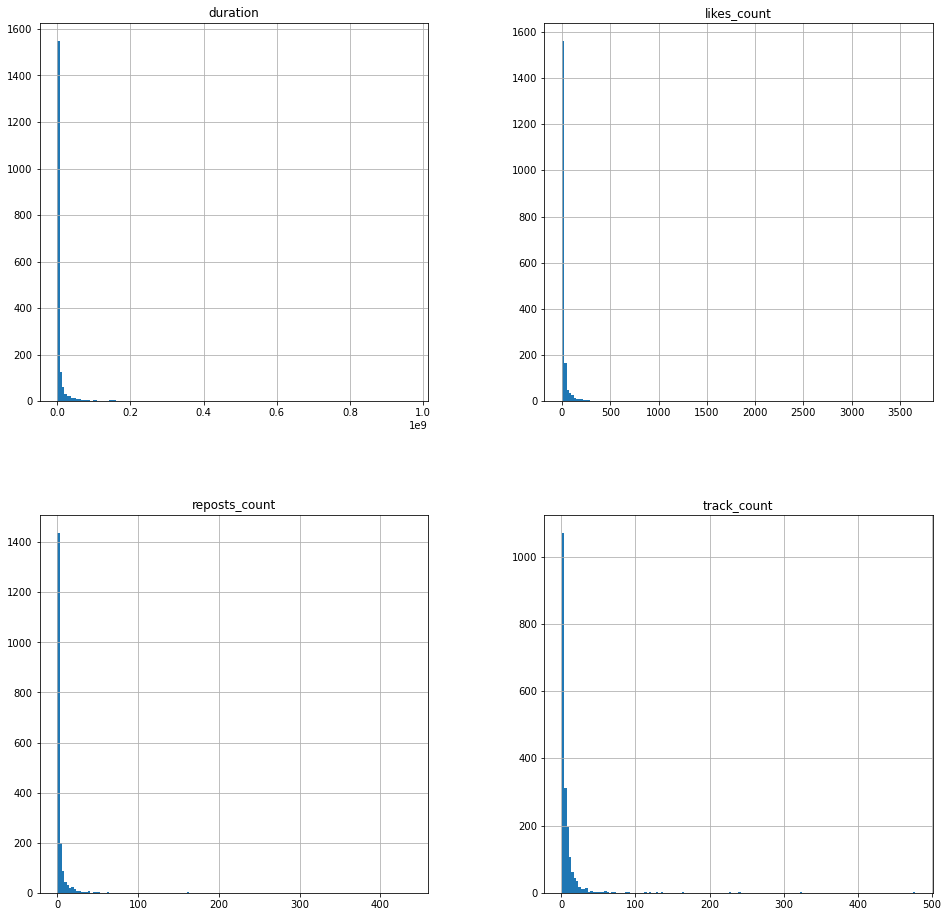

In [6]:
num_pl.hist(figsize=(16, 16), bins=150);

Nhận xét:
- `duration`: Các playlist chủ yếu kéo dài dưới 6 tiếng, có một vài playlist kéo dài gần 10 tiếng.
- `likes_count`: Số lượt yêu thích chủ yếu nằm trong khoảng từ 0 đến 500 likes.
- `reposts_count`: Số lượt reposts count rất ít, đa số các track đều không được repost lại.
- `track_count`: Các playlist có số lương track vừa phải, không quá nhiều và chủ yếu nằm trong khoảng từ 1 đến 100 bài hát.

**Biểu đồ `boxplot` của các biến numeric**

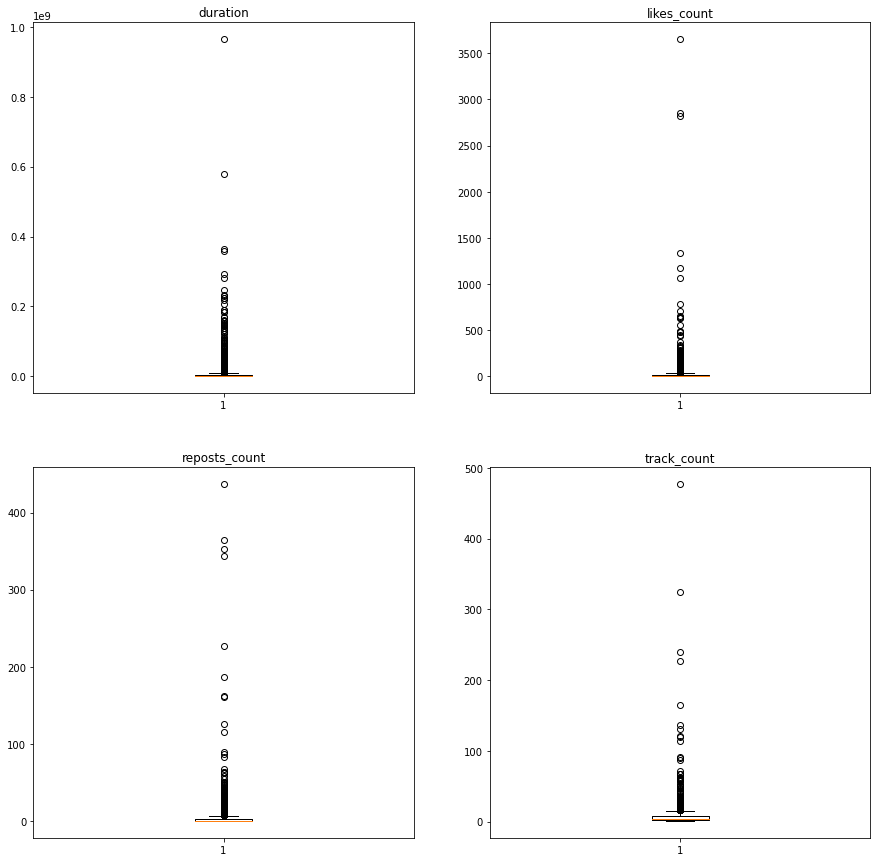

In [7]:
figure, axis = plt.subplots(2, 2, figsize=(15,15))

axis[0][0].boxplot(num_pl["duration"])
axis[0][0].set_title("duration")

axis[0][1].boxplot(num_pl["likes_count"])
axis[0][1].set_title("likes_count")

axis[1][0].boxplot(num_pl["reposts_count"])
axis[1][0].set_title("reposts_count")

axis[1][1].boxplot(num_pl["track_count"])
axis[1][1].set_title("track_count")

plt.show()

Nhận xét:
- `duration`: Đa số các playlist có độ dài dưới 4 tiếng, có 1 playlist gần 6 tiếng và có 1 playlist gần 10 tiếng.
- `likes_count`: Có 1 playlist có hơn 3500 lượt likes, 3 playlist có lượt likes từ 1000 đến 1500, còn lại đều dưới 500 lượt likes.
- `reposts_count`: Số lượt repost khá ít dưới 100 chiếm khá nhiều và có 1 playlist được repost hơn 400 lần.
- `track_count`: Đa số các playlist đều có dưới 100 tracks, có 2 playlist có từ 200 đến 300 tracks, có 1 playlist có số lượng tracks rất lớn gần 500 tracks.

**Câu hỏi**: Playlist nào nhận được nhiều lượt yêu thích nhất trong năm 2021?

Tiến hành lấy ra các playlist có năm là `2021` sau đó sắp xếp chúng theo giá trị `likes_count`. Sau đó trích xuất `10` playlist đầu tiên và vẽ biểu đồ cột minh hoạ.

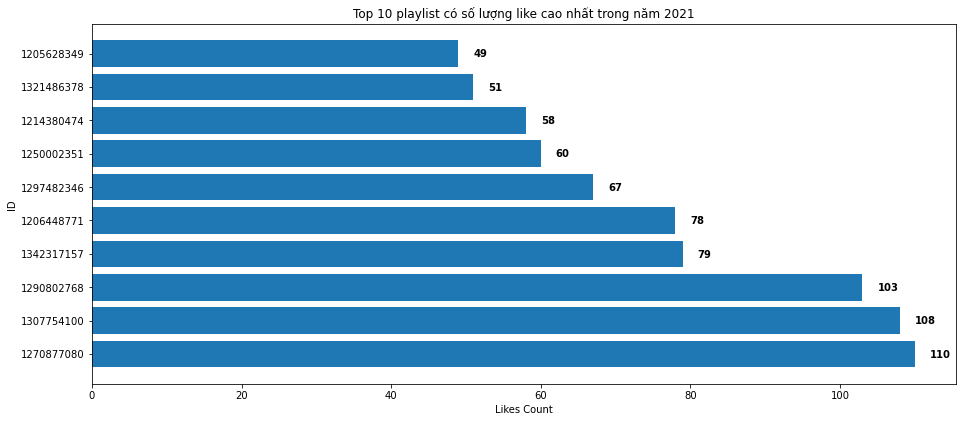

In [8]:
pl_2021 = playlist[playlist["display_date"].dt.year == 2021]
top_ten = pl_2021[["id", "likes_count"]].sort_values(by="likes_count", ascending=False)[0:10]
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.barh(top_ten["id"], top_ten["likes_count"])
ax.set_title("Top 10 playlist có số lượng like cao nhất trong năm 2021")
ax.set_ylabel("ID")
ax.set_xlabel("Likes Count")
for i, v in enumerate(top_ten["likes_count"]):
    ax.text(v + 2, i - 0.1, str(v), fontweight='bold')
plt.show()

Playlist có số lượt yêu thích cao nhất trong năm 2021 là playlist có id là `1270877080` với số lượng yêu thích là `110`. Có lẽ thời gian có mặt của playlist này trên soundcloud là chưa lâu do đó số lượt like khá hạn chế!

##### **b) Phân tích đa biến**

Biểu thị sự tương quan (correlation) giữa các thuộc tính thông qua hệ số pearson.

In [9]:
corr = num_pl.corr(method='pearson')
corr

,duration,likes_count,reposts_count,track_count
duration,1.000000,0.026536,0.026454,0.371155
likes_count,0.026536,1.000000,0.954894,0.008515
reposts_count,0.026454,0.954894,1.000000,0.005564
track_count,0.371155,0.008515,0.005564,1.000000


`Heat map` biểu thị sự tương quan (correlation) giữa các thuộc tính có kiểu dữ liệu numerical.

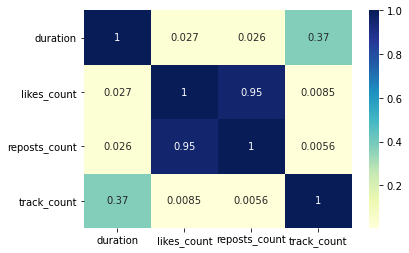

In [10]:
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Nhận xét:
- Hai thuộc tính `likes_count` và `reposts_count` có mức độ tương quan rất cao lên đến `95%`. Điều này cho thấy rằng những `playlist` có chất lượng, có số lượng người yêu thích càng nhiều thì càng có khả năng được repost lại nhiều hơn và ngược lại.
- Các cặp thuộc tính còn lại tuy vẫn có sự tương quan nhưng đều là như tương quan yếu (<50%) thậm chí rất yếu (<10%).
- Hệ số tương quan giữa hai thuộc tính `likes_count` và `track_count` chỉ là `0.85%` (rất yếu) do đó ta có thể khẳng định được rằng hai thuộc tính gần như độc lập và không có sự tác động lẫn nhau => Số lượng track có trong 1 playlist không có ảnh hưởng gì đến số lượt likes của playlist đó.

Để có cái nhìn rõ ràng hơn, ta sẽ sử dụng `biểu đồ phân tán (scatter plot)` để biểu diễn rõ mối quan hệ giữa hai thuộc tính `likes_count` và `reposts_count`

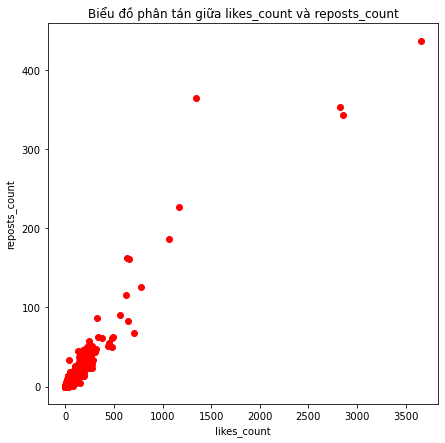

In [11]:
plt.figure(figsize=(7, 7))
plt.scatter(num_pl["likes_count"], num_pl["reposts_count"], c="red")
plt.title("Biểu đồ phân tán giữa likes_count và reposts_count")
plt.xlabel("likes_count")
plt.ylabel("reposts_count")
plt.show()

Nhận xét:
- Các điểm dữ liệu kết hợp với nhau tạo thành 1 dạng đường chéo hướng lên chứng tỏ giữa hai thuộc tính có mối quan hệ tương quan dương với nhau.

**Câu hỏi:** Liệu có playlist nào có số lượng track rất ít <= 5 bài nhưng lượt yêu thích lại khá cao >= 1000 likes hay không?

In [12]:
playlist[(playlist["track_count"] <= 5) & (playlist["likes_count"] >= 1000)]

,id,permalink_url,genre,duration,likes_count,reposts_count,user_id,is_album,display_date,track_count,tracks
278,233278684,https://soundcloud.com/pan-pot/sets/pan-pot-of...,general,7810219,1168,227,488,False,2016-06-13,2,"268871300,267975150"
882,681168750,https://soundcloud.com/hnny/sets/puss,general,1459801,1067,187,1416,False,2019-01-08,4,"82333171,119301398,124146092,132824178"


Có thể thấy có `2` playlist có số lượng track rất ít < 5 tuy nhiên số lượt like của chúng vẫn khá cao. Đây là ví dụ cho thấy số lượng track có trong 1 playlist không có ảnh hưởng gì đến số lượt likes của playlist đó!

#### **2.2 Dữ liệu phân loại (categorical)**

**Câu hỏi:** Liệu rằng các playlist có ở trên soundcloud đều là những album ca nhạc chỉnh chu do 1 nghệ sĩ phát hành hay đa phần là do người dùng tự tổng hợp lại?
- Đối với câu hỏi này, ta sẽ chọn biểu đồ dạng đường tròn (pie chart) để biểu diễn sự phân bố của giá trị.

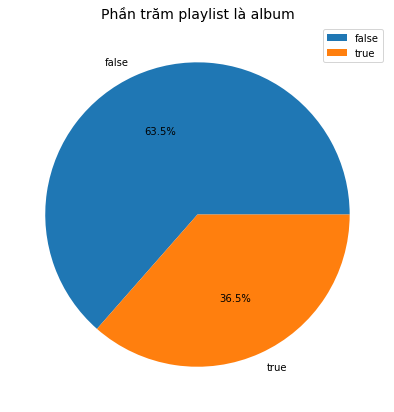

In [13]:
album_pl = playlist[["id", "is_album"]]
album_vals = album_pl.groupby("is_album")["id"].count()
col = ["false", "true"]
plt.figure(figsize=(7, 7))
plt.pie(album_vals, autopct="%.1f%%", labels=col)
plt.title("Phần trăm playlist là album", fontsize=14);
plt.legend()
plt.show()

Nhận xét:
- Có thể thấy số lượng playlist không phải là album (false) chiếm số lượng gấp đôi số playlist là album, đều này cho thấy rằng nền tảng Soundcloud là một nền tảng mở. Tất cả mọi người dùng (nghiệp dư) đều có thể đăng nhạc, đăng bài hát của chính mình chứ không bắt buộc phải là 1 ca sĩ, nhạc sĩ chuyên nghiệp. Phần lớn các playlist là do người dùng tự tổng hợp chứ không phải là album chỉnh chu chuyên nghiệp.
- Người dùng soundcloud có thể tạo bất cứ playlist nhạc nào mà mình thích, không có sự kiểm duyệt về nội dung cũng như hình thức của playlist nhạc đó (is_album == false).

**Câu hỏi:** Không xét đến thể loại `general`, đâu là thể loại âm nhạc được đăng tải nhiều nhất trong vòng 10 năm (2010-2020)? Liệu `hip-hop & rap` có phải là xu hướng âm nhạc của thế giới không nói chung và Soundcloud nói riêng hay không?

<AxesSubplot:xlabel='count', ylabel='genre'>

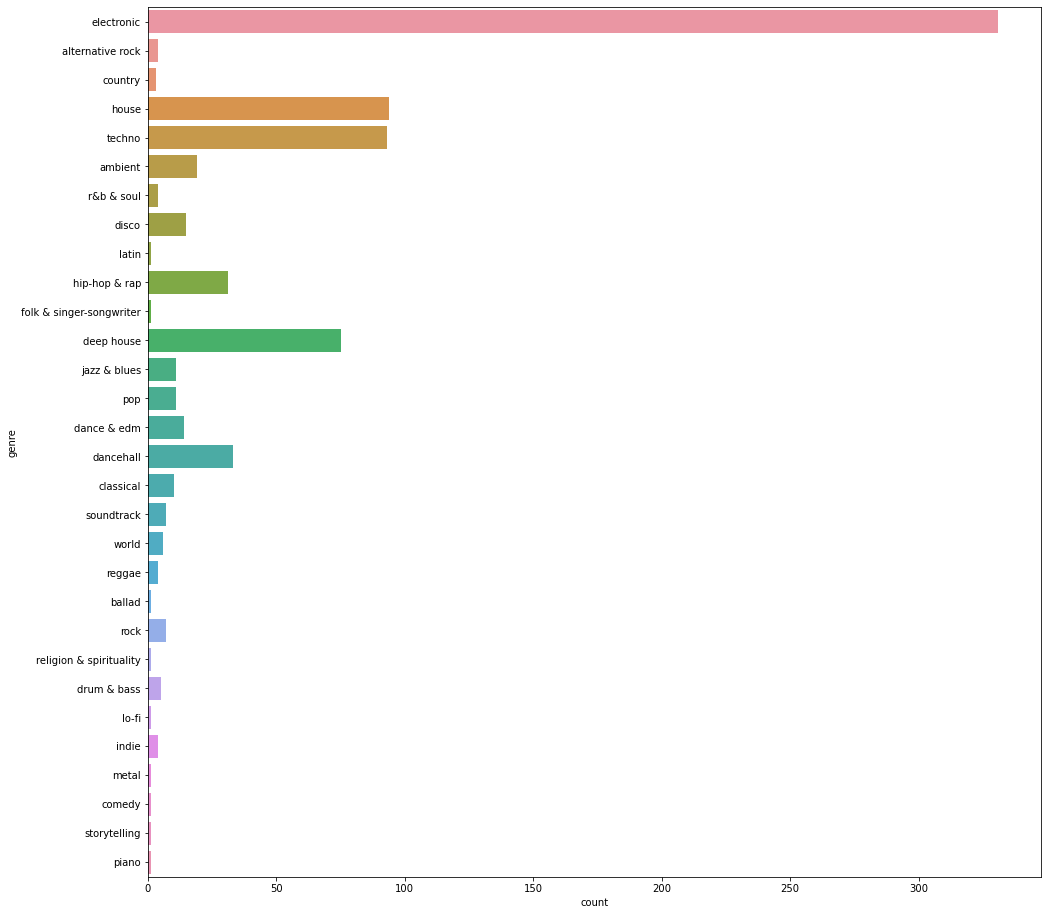

In [14]:
genre_pl = playlist[(playlist["display_date"].dt.year >= 2010) 
                    & (playlist["display_date"].dt.year <= 2020)
                    & (playlist["genre"] != "general")]
plt.figure(figsize=(16, 16))
sns.countplot(y="genre", data=genre_pl)

Nhận xét:
- Có một sự vượt trội về số lượng playlist trong vòng 10 năm của thế loại `electronic`. Không phải `hip-hop & rap` đang là trend của âm nhạc thế giới mà là nhạc điện tử `electronic` mới đang chiếm ưu thế vượt trội. `house` và `techno` cũng là 2 thế loại đang được quan tâm rất nhiều.
- Sự trỗi dậy của dòng nhạc điện tử trong vòng 10 năm có sự đóng góp không hề nhỏ của các DJ nổi tiếng như `Calvin Harris`, `Martin Garrix`, `Alan Walker`,... với những bài nhạc điện tử có đến hàng tỷ lượt nghe trên toàn thế giới.

**Câu hỏi**: Yếu tố nào quyết định 1 `playlist` được nhiều người yêu thích:

- Thể loại của playlist (genre)?

Để trả lời cho câu hỏi này, đầu tiên ta rút trích dữ liệu gồm 3 cột `genre`, và `likes_count` sau đó sắp xếp dữ liệu giảm dần theo số lượng likes. Có những `playlist` có lượt likes = 0 do đó không có đóng góp gì vào việc so sánh, ta chỉ lấy ra 500 playlist đầu tiên để đánh giá các thuộc tính.

In [15]:
likes_pl = playlist[["genre", "likes_count"]].sort_values(by="likes_count", ascending=False)
likes_pl = likes_pl[0:500]
likes_pl

,genre,likes_count
1251,general,3653
884,general,2856
1250,storytelling,2824
279,electronic,1339
278,general,1168
...,...,...
1757,general,14
745,general,14
94,general,14
1446,hip-hop & rap,14


Để đánh giá được rằng liệu thể loại âm nhạc có ảnh hưởng tới việc một playlist có được nhiều lượt yêu thích hay không, ta sẽ chia các thể loại thành 2 phần:
- Thể loại `general`: thể loại chung (tổng hợp)
- Thể loại cụ thể: phần còn lại.
    - Tính phần trăm của hai phần để so sánh tổng lượt like của chúng.

In [16]:
group_genre = likes_pl.groupby(['genre'], as_index=False).sum()
general_count = group_genre[group_genre["genre"] == "general"]["likes_count"]
general_type = round(general_count / group_genre["likes_count"].sum() * 100, 2)
rest_type = 100 - general_type
print(f"Phần trăm lượt thích của thể loại general là {float(general_type)}%")
print(f"Phần trăm lượt thích của thể loại còn lại là {float(rest_type)}%")

Phần trăm lượt thích của thể loại general là 51.91%
Phần trăm lượt thích của thể loại còn lại là 48.09%


Nhận xét:
- Có thể thấy sự chênh lệch giữa hai kiểu thể loại trên là không quá cao.
- Tuy nhiên sự chênh lệch này cho thấy rằng, người dùng sẽ có xu hướng muốn nghe những playlist nó thể loại là `general` hơn có lẻ bởi vì chúng đa dạng, nhiều màu sắc âm nhạc hơn so với việc nghe một thể loại âm nhạc cụ thể nào đó.